# Proyecto

Variables de entorno

In [1]:
import numpy as np

max_carros = 20 
lambda_ns = 0.2  # Tasa de llegada para Norte-Sur
lambda_eo = 0.1  # Tasa de llegada para Este-Oeste
acciones = [0, 1]  # Mantener y cambiar


Espacio de estados

In [2]:
# Generamos todos los estados posibles
estados = []
for n in range(max_carros + 1):
    for m in range(max_carros + 1):
        for s in [0, 1]:
            estados.append((n, m, s))


Q-table

In [3]:
# Inicializar la tabla Q con ceros
Q_table = {}
for estado in estados:
    Q_table[estado] = np.zeros(len(acciones))


### Algortimo

Parametros de aprendizaje

In [4]:

alpha = 0.1  # Tasa de aprendizaje (entre 0.1 y 0.5) (valores altos -> rapido e insetable) (valores bajos -> lento y estable)
gamma = 0.95  # Factor de descuento (entre 0.9 y 0.99) (valores altos -> recompensas a futuro) (valores bajos -> recompensas cercanas)
epsilon_inicial = 1.0
epsilon_final = 0.01
simulaciones = 100000

decre_simulacion = int(simulaciones * 0.8) 
epsilon_decre = (epsilon_final / epsilon_inicial) ** (1 / decre_simulacion)


Funcion de transicion

In [5]:
def paso_discreto(estado, accion):
    n, m, s = estado
    recompensa = 0

    # Llegada de nuevos carros bajo Poisson
    nuevos_ns = np.random.poisson(lambda_ns)
    nuevos_eo = np.random.poisson(lambda_eo)

    n = min(n + nuevos_ns, max_carros)
    m = min(m + nuevos_eo, max_carros)

    # Si mantiene
    if accion == 0:
        if s == 0 and n > 0: # Si hay carros en NS
            n -= 1 # Pasa un auto
            recompensa += 1
        elif s == 1 and m > 0:# Si hay carros en EO
            m -= 1 # Pasa un auto
            recompensa += 1
    # Si cambia
    else:
        s = 1 - s  # Cambiar estado del semáforo
        recompensa -= 0.5  # penalizacion de cambio

        pass # Solo pasa 1 auto

    # Penalizacion autos en espera
    recompensa -= 0.1 * (n + m)

    # Estado actualizado
    sig_estado = (n, m, s)

    return sig_estado, recompensa


Bucle de entrenamiento

In [6]:
epsilon = epsilon_inicial

recompensas_simulaciones = [] # recompensas por simulacion

for simulacion in range(simulaciones):
    
    # Estado inicial aleatorio
    estado = (np.random.randint(0, max_carros + 1),
             np.random.randint(0, max_carros + 1),
             np.random.choice([0, 1]))

    terminar = False
    recompensa_total = 0
    pasos = 0

    while not terminar:
    
        if np.random.rand() < epsilon:
            accion = np.random.choice(acciones)
        else:
            accion = np.argmax(Q_table[estado]) 

        sig_estado, recompensa = paso_discreto(estado, accion)

        # Actualización de Q-learning
        sig_mejor_accion = np.argmax(Q_table[sig_estado])

        td_objetivo = recompensa + gamma * Q_table[sig_estado][sig_mejor_accion] # R + gamma * Q(St+1, a)
        td_error = td_objetivo - Q_table[estado][accion] # td_target - Q(S, A)

        Q_table[estado][accion] += alpha * td_error # Q(S, A) + alpha *  -> Actualiza probabilidad

        # Actualizar el estado
        estado = sig_estado
        pasos += 1

        # Condición para terminar el episodio
        if pasos >= 100:
            recompensa_total += recompensa
            terminar = True

    # Decaimiento de epsilon
    if epsilon > epsilon_final:
        epsilon *= epsilon_decre
    else:
        epsilon = epsilon_final

    recompensas_simulaciones.append(recompensa_total)

    # Mostrar progreso cada 100 simulaciones
    if (simulacion + 1) % 100 == 0:
        print(f'Episodio {simulacion + 1}/{simulaciones}, epsilon: {epsilon:.4f}')


Episodio 100/100000, epsilon: 0.9943
Episodio 200/100000, epsilon: 0.9886
Episodio 300/100000, epsilon: 0.9829
Episodio 400/100000, epsilon: 0.9772
Episodio 500/100000, epsilon: 0.9716
Episodio 600/100000, epsilon: 0.9661
Episodio 700/100000, epsilon: 0.9605
Episodio 800/100000, epsilon: 0.9550
Episodio 900/100000, epsilon: 0.9495
Episodio 1000/100000, epsilon: 0.9441
Episodio 1100/100000, epsilon: 0.9386
Episodio 1200/100000, epsilon: 0.9333
Episodio 1300/100000, epsilon: 0.9279
Episodio 1400/100000, epsilon: 0.9226
Episodio 1500/100000, epsilon: 0.9173
Episodio 1600/100000, epsilon: 0.9120
Episodio 1700/100000, epsilon: 0.9068
Episodio 1800/100000, epsilon: 0.9016
Episodio 1900/100000, epsilon: 0.8964
Episodio 2000/100000, epsilon: 0.8913
Episodio 2100/100000, epsilon: 0.8861
Episodio 2200/100000, epsilon: 0.8810
Episodio 2300/100000, epsilon: 0.8760
Episodio 2400/100000, epsilon: 0.8710
Episodio 2500/100000, epsilon: 0.8660
Episodio 2600/100000, epsilon: 0.8610
Episodio 2700/100000,

### Evaluar rendimiento

In [7]:
estado = (np.random.randint(0, max_carros + 1),
         np.random.randint(0, max_carros + 1),
         np.random.choice([0, 1]))
recompensa_total = 0
pasos = 0
max_pasos = 100

while pasos < max_pasos:
    accion = np.argmax(Q_table[estado])  # Seleccionar la mejor acción
    sig_estado, recompensa = paso_discreto(estado, accion)
    recompensa_total += recompensa
    estado = sig_estado
    pasos += 1

print(f'Recompensa total en evaluación: {recompensa_total}')


Recompensa total en evaluación: 13.000000000000002


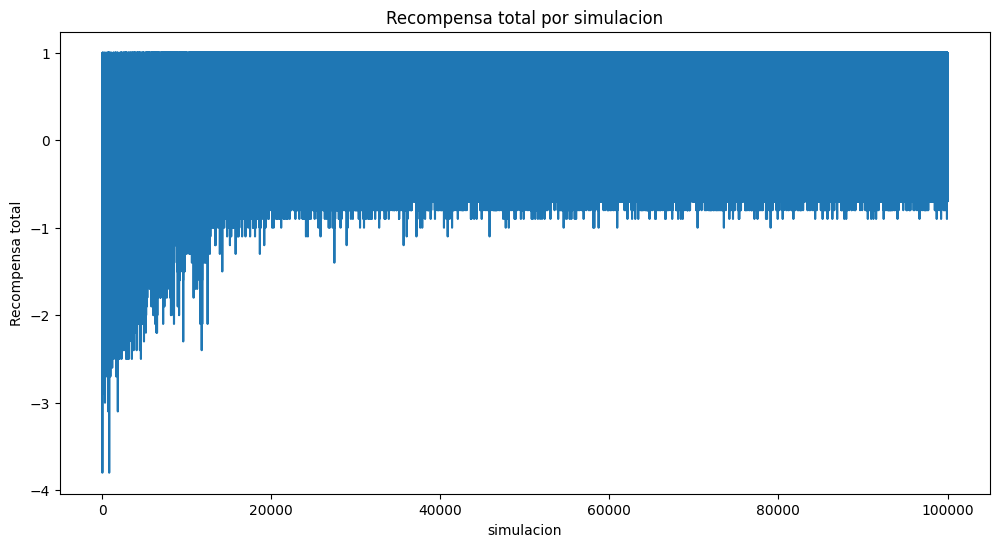

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(recompensas_simulaciones)
plt.xlabel('simulacion')
plt.ylabel('Recompensa total')
plt.title('Recompensa total por simulacion')

#valor_minimo = np.percentile(recompensas_simulaciones, 5)
# = np.percentile(recompensas_simulaciones, 95)


plt.show()

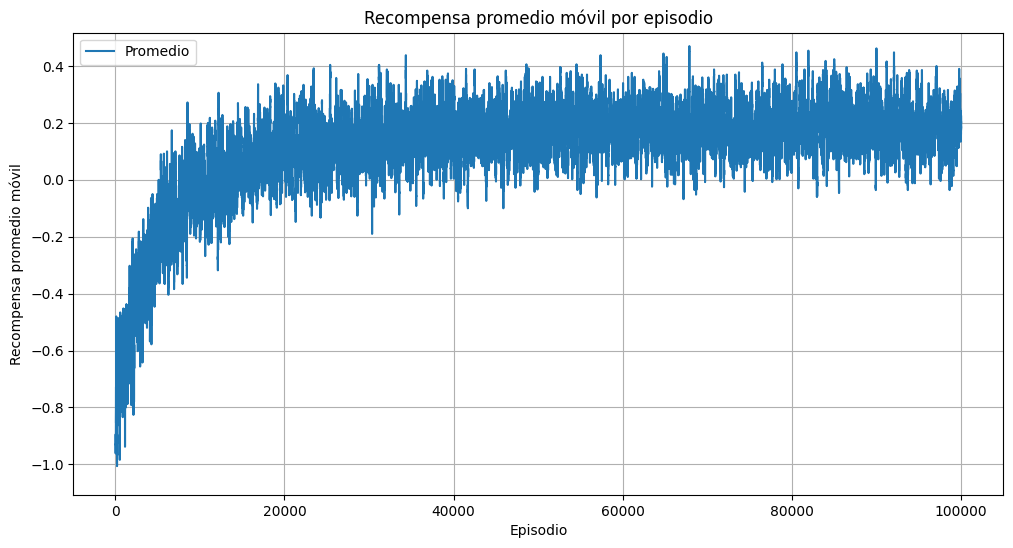

In [9]:
import numpy as np
import matplotlib.pyplot as plt

size = 50
moving_avg = np.convolve(recompensas_simulaciones, np.ones(size)/size, mode='valid')

plt.figure(figsize=(12, 6))

plt.plot(range(size, len(recompensas_simulaciones)+1), moving_avg, label='Promedio')

plt.ylim([np.min(moving_avg)*1.1, np.max(moving_avg)*1.1]) 

plt.xlabel('Episodio')
plt.ylabel('Recompensa promedio móvil')
plt.title('Recompensa promedio móvil por episodio')


# Agregar cuadrícula
plt.grid(True)

# Mostrar leyenda si hay varias curvas
plt.legend()

# Mostrar el gráfico
plt.show()


In [10]:
from pprint import pprint

pprint(Q_table)

{(0, 0, 0): array([3.73899961, 2.89550782]),
 (0, 0, 1): array([2.96472353, 3.25692511]),
 (0, 1, 0): array([3.40546365, 3.66279025]),
 (0, 1, 1): array([4.48915663, 3.14671421]),
 (0, 2, 0): array([4.05071015, 4.30829041]),
 (0, 2, 1): array([5.16720363, 3.63375544]),
 (0, 3, 0): array([4.42034639, 4.85434319]),
 (0, 3, 1): array([5.75221932, 3.85042598]),
 (0, 4, 0): array([4.6448318 , 5.06260876]),
 (0, 4, 1): array([6.26943449, 3.93809892]),
 (0, 5, 0): array([4.62404322, 5.20500962]),
 (0, 5, 1): array([6.59172439, 3.93866456]),
 (0, 6, 0): array([4.53810709, 5.17979154]),
 (0, 6, 1): array([6.69492211, 3.7479176 ]),
 (0, 7, 0): array([4.12495171, 5.06553152]),
 (0, 7, 1): array([6.6537116 , 3.47108522]),
 (0, 8, 0): array([3.7291751 , 4.69469899]),
 (0, 8, 1): array([6.54484307, 3.14819301]),
 (0, 9, 0): array([3.17730944, 4.4684306 ]),
 (0, 9, 1): array([6.23979646, 2.63733402]),
 (0, 10, 0): array([2.96718989, 3.77866139]),
 (0, 10, 1): array([5.92280236, 2.0133605 ]),
 (0, 11,